# Clasificación de IRIS con k-vecinos más cercanos (kNN)

## Cargamos la base de datos de IRIS

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# constantes de directorios
DATA_FILE = './iris.csv'
OUTPUT_DIR = './out'

# directorio para guardar figuras
os.makedirs(OUTPUT_DIR, exist_ok=True)

In [2]:
iris = pd.read_csv(DATA_FILE, header=None)
iris.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

# agregar columna Id como en el dataset original
iris.insert(0, 'Id', range(1, len(iris) + 1))

## Análisis Exploratorio de Datos

In [3]:
iris.head() # primeras 5 filas
iris.tail() # últimas 5 filas
iris.info() # mostrar info
iris.describe() # mostrar desc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Preprocesamiento de datos

In [4]:
# eliminar columna 'Id' de la base de datos 'iris'
iris = iris.drop('Id', axis=1)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Visualización de Datos

### Comparamos las variables 'Sepal Length' y 'Sepal Width'

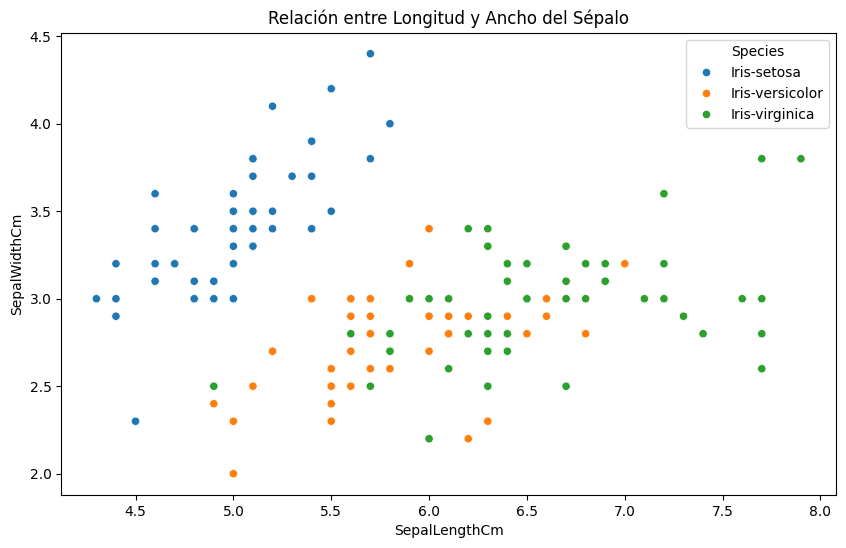

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=iris)
plt.title('Relación entre Longitud y Ancho del Sépalo')
plt.savefig(f'{OUTPUT_DIR}/sepal_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

### Comparamos las variables 'Petal Length' y 'Petal Width'

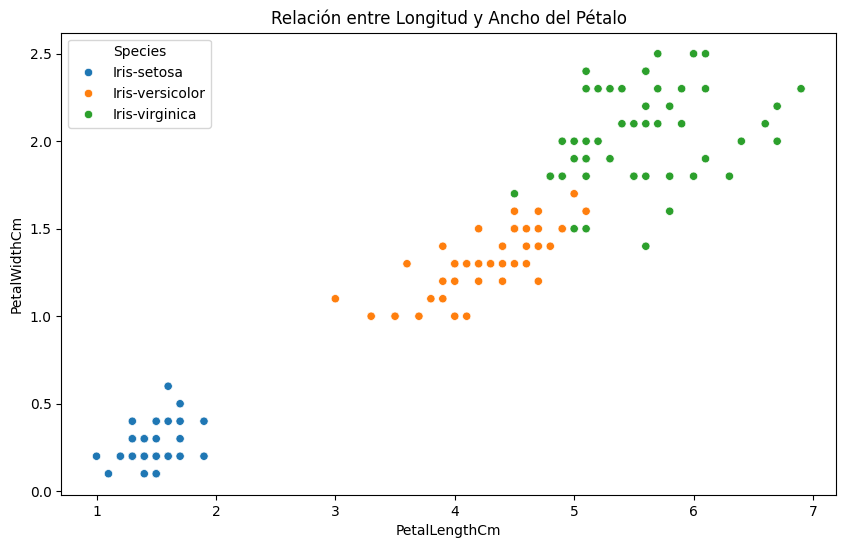

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=iris)
plt.title('Relación entre Longitud y Ancho del Pétalo')
plt.savefig(f'{OUTPUT_DIR}/petal_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

### Graficamos las relaciones de todas las columnas

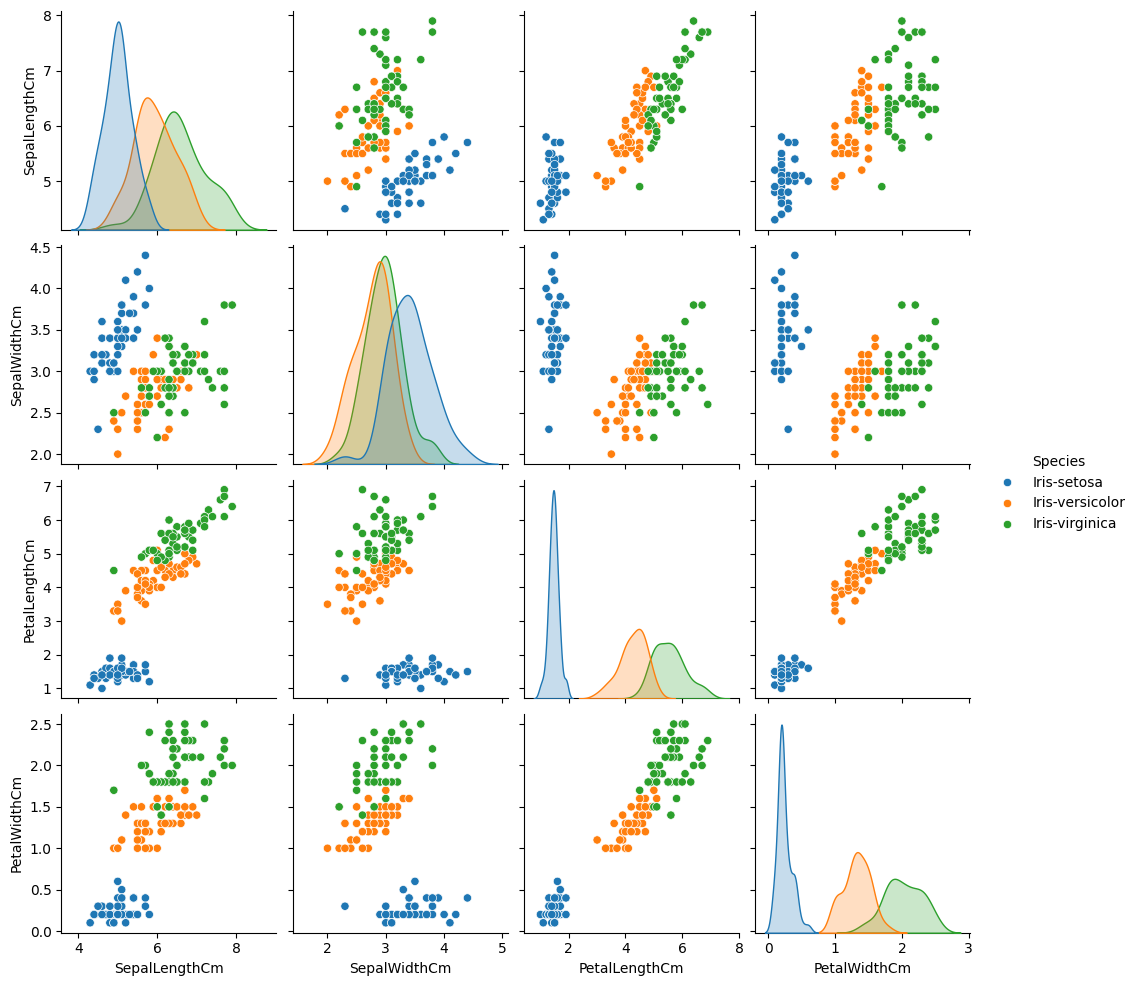

In [7]:
# relación entre las características
g = sns.pairplot(iris, hue='Species')
g.savefig(f'{OUTPUT_DIR}/pairplot_iris.png', dpi=300, bbox_inches='tight')
plt.show()

## Modelado

### Aislamos las variables predictoras

In [8]:
# aislar variables predictoras
X = iris.drop('Species', axis=1)
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Aislamos la variable objetivo

In [9]:
# aislar la variable objetivo
y = iris['Species']
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

### Dividimos los datos en sub datasets para entrenamiento y prueba

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Entrenamiento: {len(X_train)} muestras")
print(f"Prueba: {len(X_test)} muestras")
print("\nEjemplos de datos de entrenamiento:")
print(X_train.head())
print("\nEjemplos de datos de prueba:")
print(X_test.head())

Entrenamiento: 120 muestras
Prueba: 30 muestras

Ejemplos de datos de entrenamiento:
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
22            4.6           3.6            1.0           0.2
15            5.7           4.4            1.5           0.4
65            6.7           3.1            4.4           1.4
11            4.8           3.4            1.6           0.2
42            4.4           3.2            1.3           0.2

Ejemplos de datos de prueba:
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
73             6.1           2.8            4.7           1.2
18             5.7           3.8            1.7           0.3
118            7.7           2.6            6.9           2.3
78             6.0           2.9            4.5           1.5
76             6.8           2.8            4.8           1.4


### Entrenamos el clasificador k-NN

In [11]:
from sklearn.neighbors import KNeighborsClassifier

# crear modelo K-Nearest Neighbors y entrenar
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [12]:
# realizar la predicción en los datos de X_test
y_pred = classifier.predict(X_test)
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

## Evaluación del modelo

In [13]:
# métrica de precisión
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", acc)

Precisión del modelo: 1.0


## Matriz de Confusión

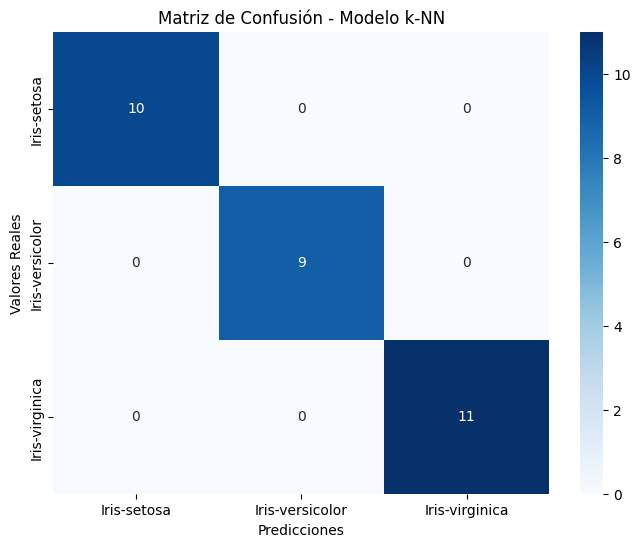

In [14]:
from sklearn.metrics import confusion_matrix

# calcular matriz de confusión con los nombres de las especias
cf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', xticklabels=iris['Species'].unique(), yticklabels=iris['Species'].unique(), cmap='Blues')
plt.title('Matriz de Confusión - Modelo k-NN')
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')
plt.savefig(f'{OUTPUT_DIR}/confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

## Experimentación con diferentes valores de k

Precisión por valor de k:
k=1: 1.0000 (100.0%)
k=2: 1.0000 (100.0%)
k=3: 1.0000 (100.0%)
k=4: 1.0000 (100.0%)
k=5: 1.0000 (100.0%)
k=6: 1.0000 (100.0%)
k=7: 0.9667 (96.7%)
k=8: 1.0000 (100.0%)
k=9: 1.0000 (100.0%)
k=10: 1.0000 (100.0%)
k=11: 1.0000 (100.0%)
k=12: 1.0000 (100.0%)
k=13: 1.0000 (100.0%)
k=14: 1.0000 (100.0%)
k=15: 1.0000 (100.0%)


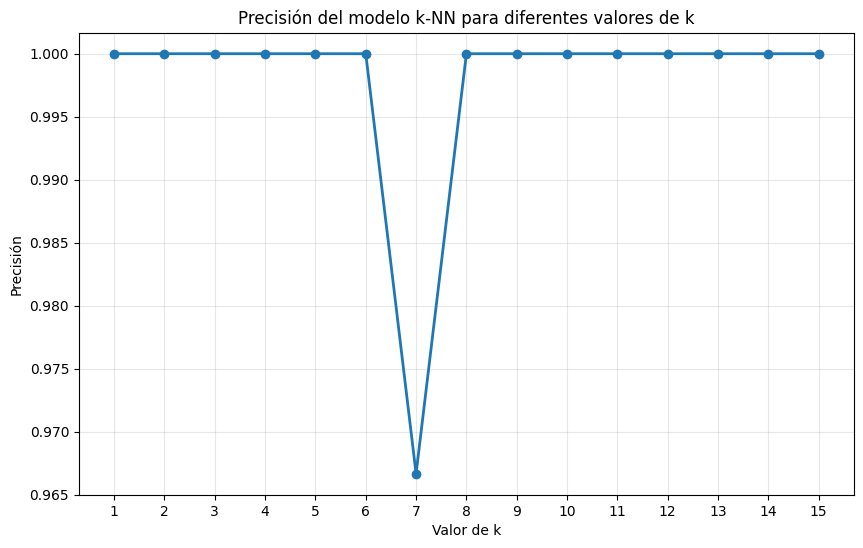


Mejor valor de k: 1 con precisión de 1.0000 (100.0%)


In [15]:
k_values = range(1, 16)
accuracies = []

print("Precisión por valor de k:")
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    acc_k = accuracy_score(y_test, y_pred_k)
    accuracies.append(acc_k)
    print(f"k={k}: {acc_k:.4f} ({acc_k*100:.1f}%)")

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linewidth=2, markersize=6)
plt.title('Precisión del modelo k-NN para diferentes valores de k')
plt.xlabel('Valor de k')
plt.ylabel('Precisión')
plt.grid(True, alpha=0.3)
plt.xticks(k_values)
plt.savefig(f'{OUTPUT_DIR}/k_values_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# mejor k
best_k = k_values[accuracies.index(max(accuracies))]
best_acc = max(accuracies)
print(f"\nMejor valor de k: {best_k} con precisión de {best_acc:.4f} ({best_acc*100:.1f}%)")